In [1]:
import pandas as pd       
import math 
import numpy as np
import matplotlib.pyplot as plt  
import IPython.display as ipd  # To play sound in the notebook
import librosa
import librosa.display
import os

In [2]:
df = pd.read_csv("speakers_all.csv", header=0)


print(df.shape, 'is the shape of the dataset') 
print('------------------------') 
print(df.head())

(2172, 12) is the shape of the dataset
------------------------
    age  age_onset              birthplace  filename native_language   sex  \
0  24.0       12.0         koussi, senegal   balanta         balanta  male   
1  18.0       10.0          buea, cameroon  cameroon        cameroon  male   
2  48.0        8.0  hong, adamawa, nigeria  fulfulde        fulfulde  male   
3  42.0       42.0   port-au-prince, haiti   haitian         haitian  male   
4  40.0       35.0   port-au-prince, haiti   haitian         haitian  male   

   speakerid   country  file_missing?  Unnamed: 9  Unnamed: 10 Unnamed: 11  
0        788   senegal           True         NaN          NaN         NaN  
1       1953  cameroon           True         NaN          NaN         NaN  
2       1037   nigeria           True         NaN          NaN         NaN  
3       1165     haiti           True         NaN          NaN         NaN  
4       1166     haiti           True         NaN          NaN         NaN  


Удалим неопределенные столбцы

In [3]:
df.drop(df.columns[9:12],axis = 1, inplace = True)
print(df.columns)
df.describe()

Index(['age', 'age_onset', 'birthplace', 'filename', 'native_language', 'sex',
       'speakerid', 'country', 'file_missing?'],
      dtype='object')


,age,age_onset,speakerid
count,2172.000000,2172.000000,2172.000000
mean,33.117173,8.833333,1088.449355
std,14.453039,8.451127,628.420329
min,0.000000,0.000000,1.000000
25%,22.000000,0.000000,543.750000
50%,28.000000,8.000000,1088.500000
75%,41.000000,13.000000,1632.250000
max,97.000000,86.000000,2176.000000


### Удалим записи, не соответствующие странам с минимум 30 респондентами в выборке

In [4]:
from collections import Counter
countr = Counter(list(df['country']))
new_countries = [x for x, y in countr.items() if y >= 30]

In [5]:
for i in range(len(list(df['country']))):
    if df['country'][i] not in new_countries:
        df.drop([i], inplace = True)

In [6]:
print(df.head())

     age  age_onset              birthplace   filename native_language  \
9   73.0        5.0  pepeekeo, hawai'i, usa    hawai'i         hawai'i   
10  69.0        4.0     pa'ia, hawai'i, usa    hawai'i         hawai'i   
20  25.0        5.0   jammu, kashmir, india   poonchi1         poonchi   
50  20.0        5.0   addis ababa, ethiopia   amharic1         amharic   
51  29.0       19.0        gonder, ethiopia  amharic10         amharic   

       sex  speakerid   country  file_missing?  
9     male       1675       usa           True  
10  female       1676       usa           True  
20    male        425     india           True  
50  female          6  ethiopia          False  
51  female        998  ethiopia          False  


### Получим сумму zero-crossing по каждой из записей

/Users/igor/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


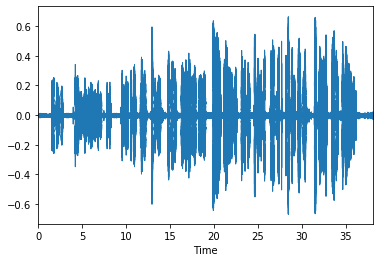

In [11]:
x, sr = librosa.load('recordings/amharic1.mp3')
librosa.display.waveplot(x, sr=sr)

In [13]:
df = df[df['file_missing?'] == False]
print(df.head())

     age  age_onset             birthplace   filename native_language     sex  \
50  20.0        5.0  addis ababa, ethiopia   amharic1         amharic  female   
51  29.0       19.0       gonder, ethiopia  amharic10         amharic  female   
52  24.0       17.0  addis ababa, ethiopia  amharic11         amharic  female   
53  26.0       15.0  addis ababa, ethiopia  amharic12         amharic  female   
54  28.0        6.0  addis ababa, ethiopia  amharic13         amharic  female   

    speakerid   country  file_missing?  
50          6  ethiopia          False  
51        998  ethiopia          False  
52       1129  ethiopia          False  
53       1130  ethiopia          False  
54       1131  ethiopia          False  


In [20]:
%%time
zero_crossings = []
for name in list(df['filename']):
    path = 'recordings/' + name + '.mp3'
    x, sr = librosa.load(path)
    zero_crossings.append(sum(librosa.zero_crossings(x)))

/Users/igor/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/igor/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/igor/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/igor/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/Users/igor/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Try

CPU times: user 41min 23s, sys: 26.9 s, total: 41min 49s
Wall time: 42min 6s


In [21]:
df['zero_crossings'] = zero_crossings

In [22]:
df.head()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,zero_crossings
50,20.0,5.0,"addis ababa, ethiopia",amharic1,amharic,female,6,ethiopia,False,67653
51,29.0,19.0,"gonder, ethiopia",amharic10,amharic,female,998,ethiopia,False,73627
52,24.0,17.0,"addis ababa, ethiopia",amharic11,amharic,female,1129,ethiopia,False,80457
53,26.0,15.0,"addis ababa, ethiopia",amharic12,amharic,female,1130,ethiopia,False,64523
54,28.0,6.0,"addis ababa, ethiopia",amharic13,amharic,female,1131,ethiopia,False,103747


### Проведем ANOVA-анализ по аттрибутам родного языка, пола и возраста для уровня значимости 0.15, игнорируя дискретность признака zero-crossing и учитывая также межфакторное взаимодействие.

In [23]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [24]:
model = ols('zero_crossings ~ age*C(native_language)*C(sex)', df).fit()

In [27]:
table_F = sm.stats.anova_lm(model, typ=1)
table_F

,df,sum_sq,mean_sq,F,PR(>F)
C(native_language),55.0,2.736085e+11,4.974700e+09,6.971957,1.029247e-40
C(sex),1.0,1.183476e+10,1.183476e+10,16.586209,5.051896e-05
C(native_language):C(sex),55.0,7.713868e+10,1.402521e+09,1.965610,5.546521e-05
age,1.0,1.288346e+10,1.288346e+10,18.055942,2.365020e-05
age:C(native_language),55.0,8.298674e+10,1.508850e+09,2.114627,7.632932e-06
age:C(sex),1.0,1.057894e+08,1.057894e+08,0.148262,7.002914e-01
age:C(native_language):C(sex),55.0,4.193648e+10,7.624815e+08,1.068605,3.449843e-01
Residual,914.0,6.521664e+11,7.135300e+08,NaN,NaN


In [30]:
table_F[table_F['PR(>F)'] <= 0.15]

,df,sum_sq,mean_sq,F,PR(>F)
C(native_language),55.0,2.736085e+11,4.974700e+09,6.971957,1.029247e-40
C(sex),1.0,1.183476e+10,1.183476e+10,16.586209,5.051896e-05
C(native_language):C(sex),55.0,7.713868e+10,1.402521e+09,1.965610,5.546521e-05
age,1.0,1.288346e+10,1.288346e+10,18.055942,2.365020e-05
age:C(native_language),55.0,8.298674e+10,1.508850e+09,2.114627,7.632932e-06


In [31]:
table_F[table_F['PR(>F)'] > 0.15]

,df,sum_sq,mean_sq,F,PR(>F)
age:C(sex),1.0,1.057894e+08,1.057894e+08,0.148262,0.700291
age:C(native_language):C(sex),55.0,4.193648e+10,7.624815e+08,1.068605,0.344984


In [33]:
model = ols('zero_crossings ~ age', df).fit()
table_F = sm.stats.anova_lm(model, typ=1)
table_F

,df,sum_sq,mean_sq,F,PR(>F)
age,1.0,7.954221e+09,7.954221e+09,8.188241,0.004301
Residual,1043.0,1.013191e+12,9.714200e+08,NaN,NaN


In [37]:
model = ols('zero_crossings ~ C(native_language)', df).fit()
table_F = sm.stats.anova_lm(model, typ=1)
table_F

,df,sum_sq,mean_sq,F,PR(>F)
C(native_language),55.0,2.736085e+11,4.974700e+09,6.581586,2.085452e-38
Residual,989.0,7.475368e+11,7.558512e+08,NaN,NaN


In [38]:
model = ols('zero_crossings ~ C(sex)', df).fit()
table_F = sm.stats.anova_lm(model, typ=1)
table_F

,df,sum_sq,mean_sq,F,PR(>F)
C(sex),1.0,1.791538e+10,1.791538e+10,18.625578,0.000017
Residual,1043.0,1.003230e+12,9.618695e+08,NaN,NaN


In [46]:
data_english = df[df['native_language'] == 'english']

In [54]:
nl = Counter(list(df['native_language']))
new_nl = [x for x, y in nl.items() if y >= 50]

In [55]:
new_nl

['english', 'korean', 'mandarin']

In [58]:
countries = Counter(list(df['country']))
new_countries = [x for x, y in countries.items() if y >= 50]
new_countries

['usa', 'uk', 'china', 'india', 'south korea', 'canada']

In [72]:
for native_language in new_nl:
    model = ols('zero_crossings ~ age*C(native_language)*C(sex)', df[df['native_language'] == native_language]).fit()
    table_F = sm.stats.anova_lm(model, typ=1)
    print('------------------------------------------------') 
    print(native_language)
    print(table_F[table_F['PR(>F)'] > 0.15])
    print('------------------------------------------------') 

------------------------------------------------
english
             df        sum_sq       mean_sq         F    PR(>F)
age:C(sex)  1.0  7.201562e+07  7.201562e+07  0.152211  0.696593
------------------------------------------------
------------------------------------------------
korean
             df        sum_sq       mean_sq         F    PR(>F)
age:C(sex)  1.0  4.769116e+08  4.769116e+08  0.592196  0.445422
------------------------------------------------
------------------------------------------------
mandarin
      df        sum_sq       mean_sq         F    PR(>F)
age  1.0  5.160702e+08  5.160702e+08  0.638305  0.428104
------------------------------------------------


In [73]:
for country in new_countries:
    model = ols('zero_crossings ~ age*C(native_language)*C(sex)', df[df['country'] == country]).fit()
    table_F = sm.stats.anova_lm(model, typ=1)
    print('------------------------------------------------') 
    print(country)
    print(table_F[table_F['PR(>F)'] > 0.15])
    print('------------------------------------------------') 

------------------------------------------------
usa
                                 df        sum_sq       mean_sq         F  \
C(native_language):C(sex)      14.0  4.598306e+09  3.284504e+08  0.721797   
age                             1.0  8.074506e+08  8.074506e+08  1.774439   
age:C(native_language)         14.0  2.455635e+09  1.754025e+08  0.385461   
age:C(sex)                      1.0  1.125709e+08  1.125709e+08  0.247384   
age:C(native_language):C(sex)  14.0  2.641949e+09  1.887107e+08  0.414707   

                                 PR(>F)  
C(native_language):C(sex)      0.752592  
age                            0.183654  
age:C(native_language)         0.978625  
age:C(sex)                     0.619219  
age:C(native_language):C(sex)  0.970043  
------------------------------------------------
------------------------------------------------
uk
                                df        sum_sq       mean_sq         F  \
C(native_language)             2.0  1.991755e+09  9.958